In [2]:
# importing dependencies
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

## Help with changing how the csv dtypes are read in

In [104]:
weather = pd.read_csv("~/Projects/NiceRide/Weather_data/01012010_12312017.csv") # Weather data

temp = []
for x in [2010 + x for x in range(8)] :
#   add dtype declaration to remove warning
    x = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/"+str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
                   # dtype = {"Start station ID" : pd.int64, "End station ID" : pd.int64, "Account type": pd.Categorical}
    temp.append(x)
    nr = pd.concat(temp)

/home/grimoire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Changing dates from objects into datetimes
weather['DATE'] = weather['DATE'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

nr['Start date'] = nr['Start date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))
nr['End date'] = nr['End date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [97]:
nr.info()
nr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694187 entries, 0 to 460715
Data columns (total 8 columns):
Start date                  object
Start station               object
Start station ID            object
End date                    object
End station                 object
End station ID              object
Account type                object
Total duration (seconds)    int64
dtypes: int64(1), object(7)
memory usage: 185.0+ MB


Start date       Start station Start station ID         End date  \
0   6/10/2010 8:01  100 Main Street SE            30000   6/10/2010 8:01   
1  6/10/2010 17:38  100 Main Street SE            30000  6/10/2010 17:54   
2  6/10/2010 21:15  100 Main Street SE            30000  6/10/2010 21:27   
3  6/11/2010 13:52  100 Main Street SE            30000  6/11/2010 14:42   
4  6/11/2010 15:20  100 Main Street SE            30000  6/11/2010 16:11   

              End station End station ID Account type  \
0      100 Main Street SE          30000       Casual   
1              IDS Center          30042       Casual   
2  11th Street & Hennepin          30004       Casual   
3  Washington & 2nd Ave N          30021       Casual   
4             Blegen Hall          30019       Casual   

   Total duration (seconds)  
0                         8  
1                       964  
2                       717  
3                      2966  
4                      3040

In [98]:
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 10 columns):
STATION    2922 non-null object
NAME       2922 non-null object
DATE       2922 non-null object
AWND       2922 non-null float64
PRCP       2922 non-null float64
SNOW       2922 non-null float64
SNWD       2922 non-null int64
TAVG       1736 non-null float64
TMAX       2922 non-null int64
TMIN       2922 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 228.4+ KB


STATION                                              NAME        DATE  \
0  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-01   
1  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-02   
2  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-03   
3  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-04   
4  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-05   

   AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  
0  8.95   0.0   0.0     9   NaN     6    -9  
1  4.03   0.0   0.0     9   NaN     1   -15  
2  2.91   0.0   0.0     9   NaN     7   -14  
3  5.59   0.0   0.0     9   NaN     7   -10  
4  3.13   0.0   0.0     9   NaN    10    -9

Working with NaN values in the Tavg column. We'll be using the max and min values in the rows with NaN values. Creating a series that has the mean of those values, and using pd.Dataframe.fillna() to replace those values with the mean.

In [105]:
weather = weather.fillna(value={'TAVG': weather[weather.TAVG.isna()][['TMAX', 'TMIN']]
                                .agg("mean", axis="columns")})
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 10 columns):
STATION    2922 non-null object
NAME       2922 non-null object
DATE       2922 non-null object
AWND       2922 non-null float64
PRCP       2922 non-null float64
SNOW       2922 non-null float64
SNWD       2922 non-null int64
TAVG       2922 non-null float64
TMAX       2922 non-null int64
TMIN       2922 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 228.4+ KB


STATION                                              NAME        DATE  \
0  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-01   
1  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-02   
2  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-03   
3  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-04   
4  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US  2010-01-05   

   AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  
0  8.95   0.0   0.0     9  -1.5     6    -9  
1  4.03   0.0   0.0     9  -7.0     1   -15  
2  2.91   0.0   0.0     9  -3.5     7   -14  
3  5.59   0.0   0.0     9  -1.5     7   -10  
4  3.13   0.0   0.0     9   0.5    10    -9

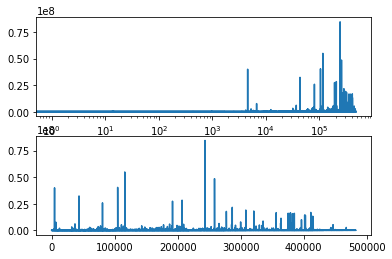

In [6]:
# Shows Total Duration (Seconds) plot
plt.subplot(2,1,1)
nr['Total duration (seconds)'].plot(logx=True)
plt.subplot(2,1,2)
nr['Total duration (seconds)'].plot()
plt.show()

In [7]:
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 10 columns):
STATION    2922 non-null object
NAME       2922 non-null object
DATE       2922 non-null datetime64[ns]
AWND       2922 non-null float64
PRCP       2922 non-null float64
SNOW       2922 non-null float64
SNWD       2922 non-null int64
TAVG       1736 non-null float64
TMAX       2922 non-null int64
TMIN       2922 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 228.4+ KB


STATION                                              NAME       DATE  \
0  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US 2010-01-01   
1  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US 2010-01-02   
2  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US 2010-01-03   
3  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US 2010-01-04   
4  USW00014922  MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US 2010-01-05   

   AWND  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  
0  8.95   0.0   0.0     9   NaN     6    -9  
1  4.03   0.0   0.0     9   NaN     1   -15  
2  2.91   0.0   0.0     9   NaN     7   -14  
3  5.59   0.0   0.0     9   NaN     7   -10  
4  3.13   0.0   0.0     9   NaN    10    -9

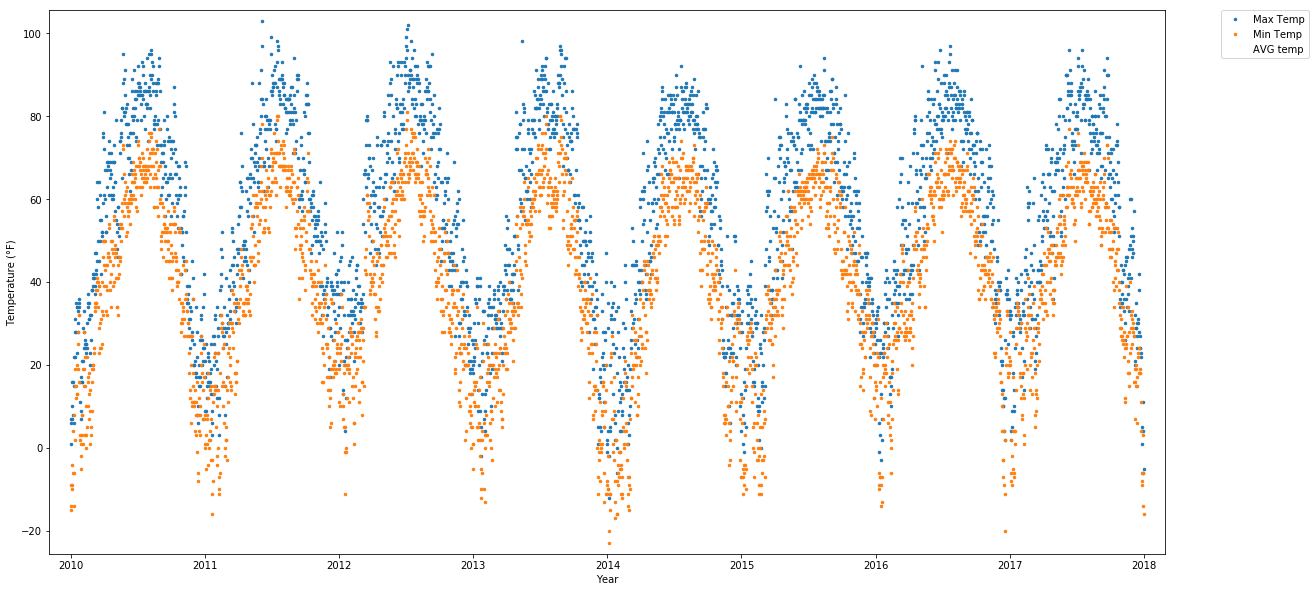

In [8]:
plt.figure(figsize=(20,10))
plt.plot(weather.DATE, weather.TMAX, markersize=5, marker='.', label = 'Max Temp', linestyle='')
plt.plot(weather.DATE, weather.TMIN, markersize=5, marker='.', label = 'Min Temp', linestyle='')
plt.plot(weather.DATE, weather.TAVG, markersize=5, marker='', label = 'AVG temp', linestyle='')
plt.xlabel('Year')
plt.ylabel('Temperature (째F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

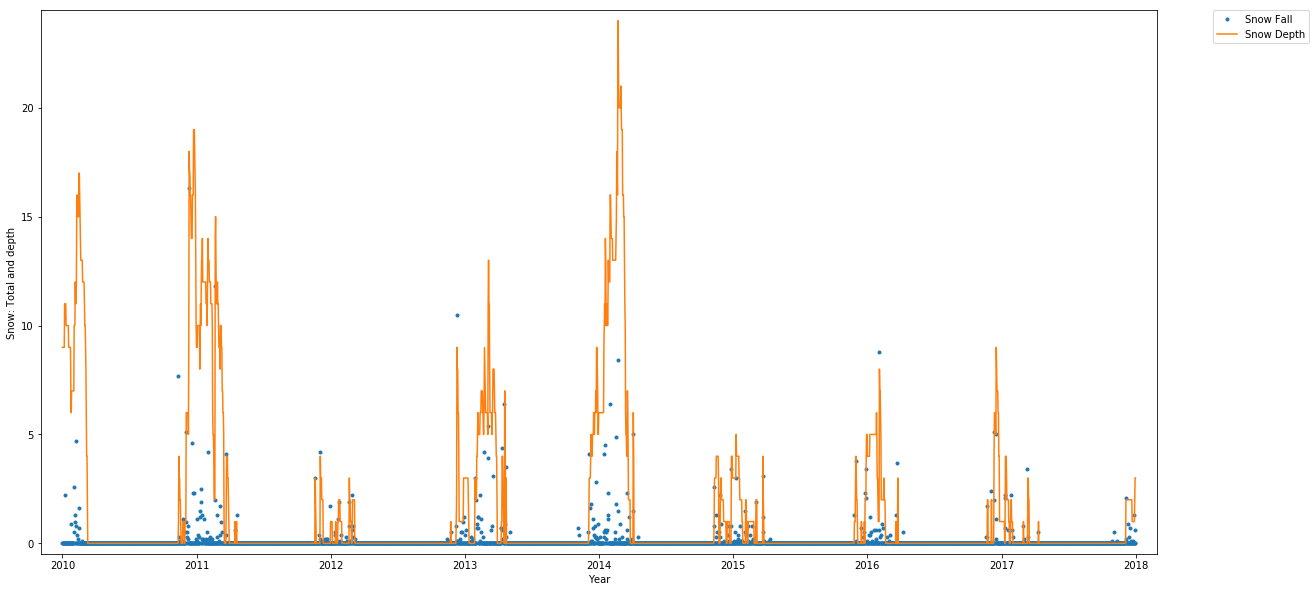

In [9]:
plt.figure(figsize=(20,10))
plt.plot(weather.DATE, weather.SNOW, marker=".", label = 'Snow Fall', linestyle='')
plt.plot(weather.DATE, weather.SNWD, label = 'Snow Depth', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Snow: Total and depth')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

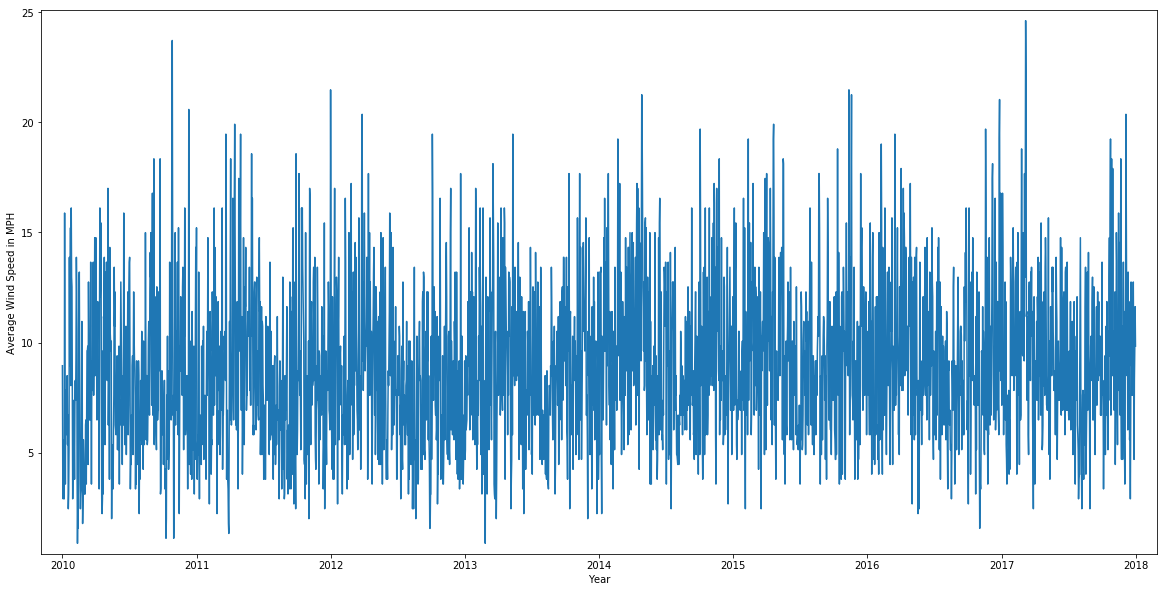

In [10]:
plt.figure(figsize=(20,10))
plt.plot(weather.DATE, weather.AWND, marker='', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed in MPH')
plt.margins(.02)
plt.show()

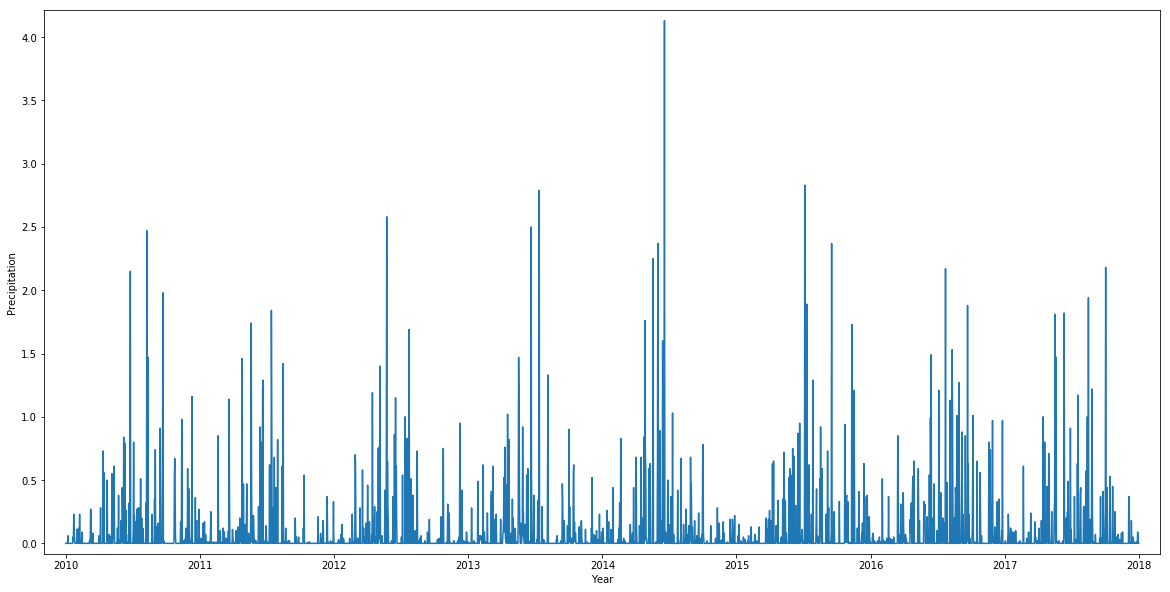

In [11]:
plt.figure(figsize=(20,10))
plt.plot(weather.DATE, weather.PRCP, marker='', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.margins(.02)
plt.show()

## Yearly data: temps and rides by day

In [12]:
weather_2010 = weather[(weather.DATE>dt.date(2010,3,31)) & (weather.DATE<dt.date(2010,12,1))]
nr_2010 = nr[(nr['Start date']>dt.date(2010,3,31)) & (nr['End date']<dt.date(2010,12,1))]

Aggregating by total rides daily

In [13]:
def daily_riders(df) :
    # Create a defaultdict of an integer: monthly_total_rides
    daily_total_rides = defaultdict(int)

    # Loop over the row nr_2010
    for index, row in df.iterrows() :
        # Add the total rides to the current amount for the day
    
        daily_total_rides[row[0]] += 1
    
    # return daily rides as a series
    return pd.Series(daily_total_rides).resample('D').count()

In [14]:
daily_total_2010 = daily_riders(nr_2010)

In [15]:
weather_2011 = weather[(weather.DATE>dt.date(2011,3,31)) & (weather.DATE<dt.date(2011,12,1))]
nr_2011 = nr[(nr['Start date']>dt.date(2011,3,31)) & (nr['End date']<dt.date(2011,12,1))]

In [16]:
daily_total_2011 = daily_riders(nr_2011)

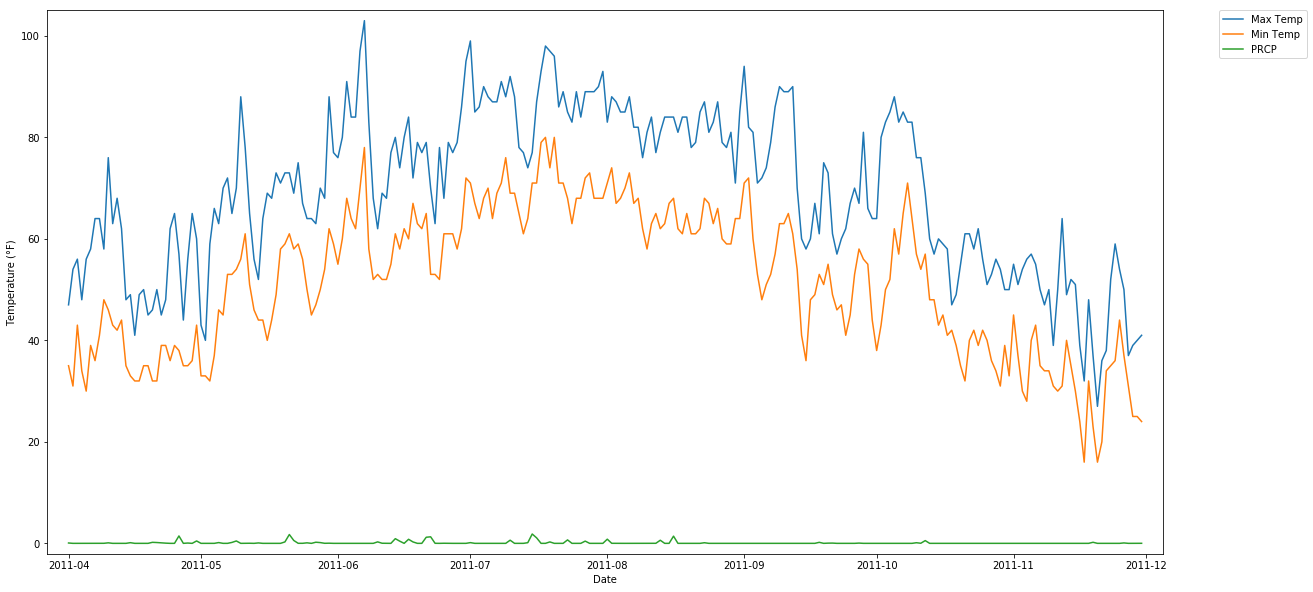

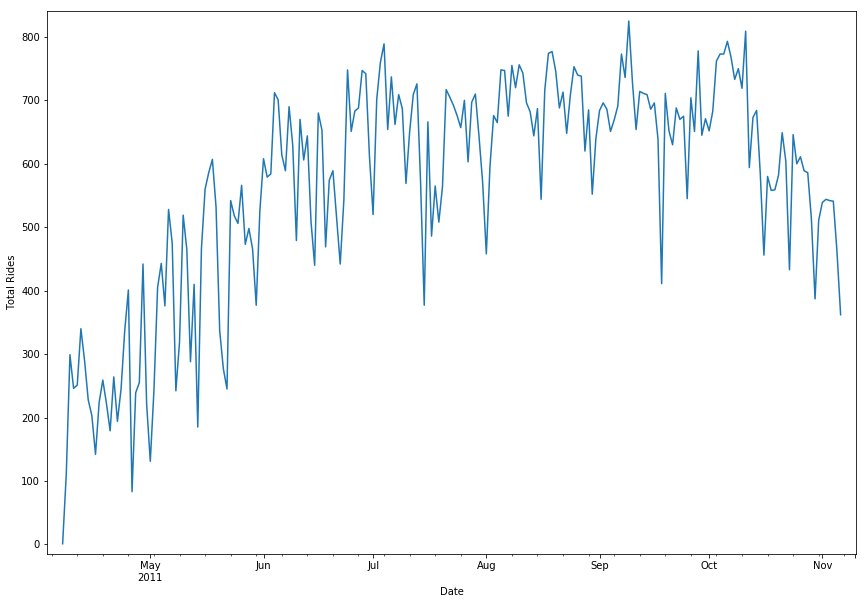

In [17]:
plt.figure(figsize=(20,10))
plt.plot(weather_2011.DATE, weather_2011.TMAX, label = 'Max Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.TMIN, label = 'Min Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.PRCP, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (째F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14.5,10))
daily_total_2011.plot()
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.margins(.02)
plt.show()

In [18]:
weather_2012 = weather[(weather.DATE>dt.date(2012,3,31)) & (weather.DATE<dt.date(2012,12,1))]
nr_2012 = nr[(nr['Start date']>dt.date(2012,3,31)) & (nr['End date']<dt.date(2012,12,1))]

In [19]:
daily_total_2012 = daily_riders(nr_2012)

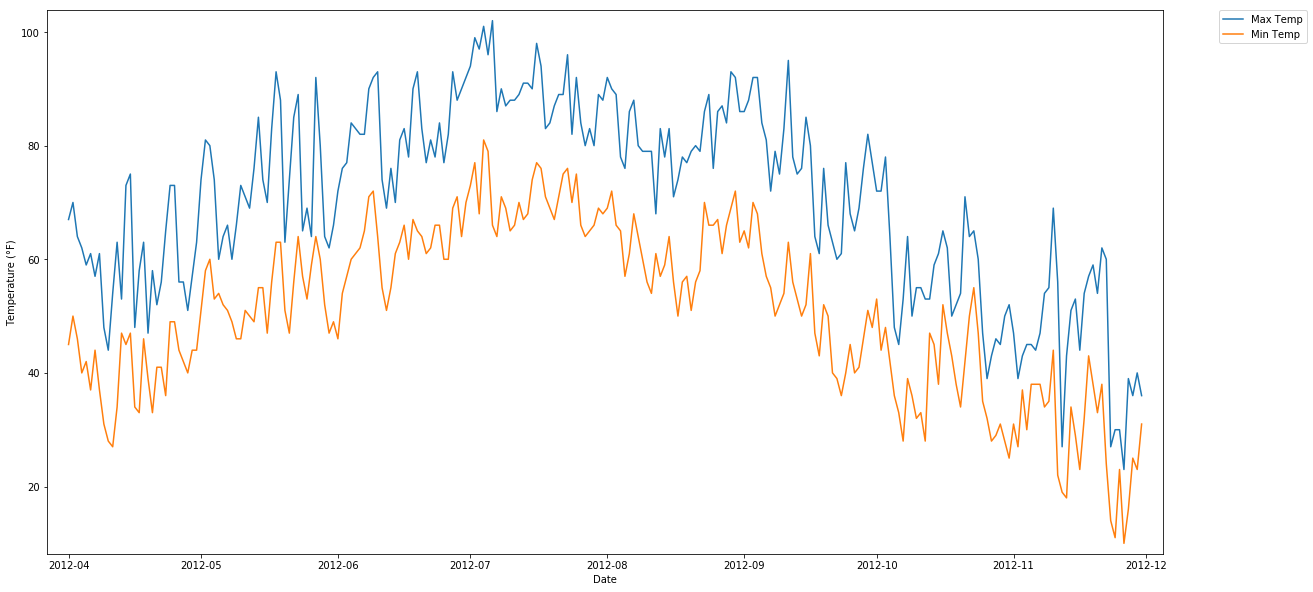

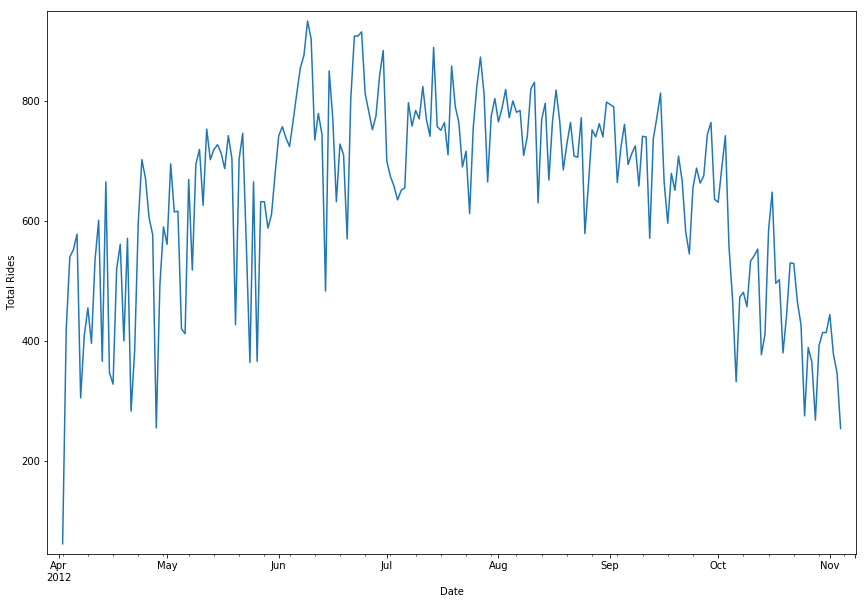

In [20]:
plt.figure(figsize=(20,10))
plt.plot(weather_2012.DATE, weather_2012.TMAX, label = 'Max Temp', linestyle='-')
plt.plot(weather_2012.DATE, weather_2012.TMIN, label = 'Min Temp', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (째F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14.5,10))
daily_total_2012.plot()
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.margins(.02)
plt.show()

In [21]:
weather_2013 = weather[(weather.DATE>dt.date(2013,3,31)) & (weather.DATE<dt.date(2013,12,1))]
nr_2013 = nr[(nr['Start date']>dt.date(2013,3,31)) & (nr['End date']<dt.date(2013,12,1))]

In [22]:
daily_total_2013 = daily_riders(nr_2013)

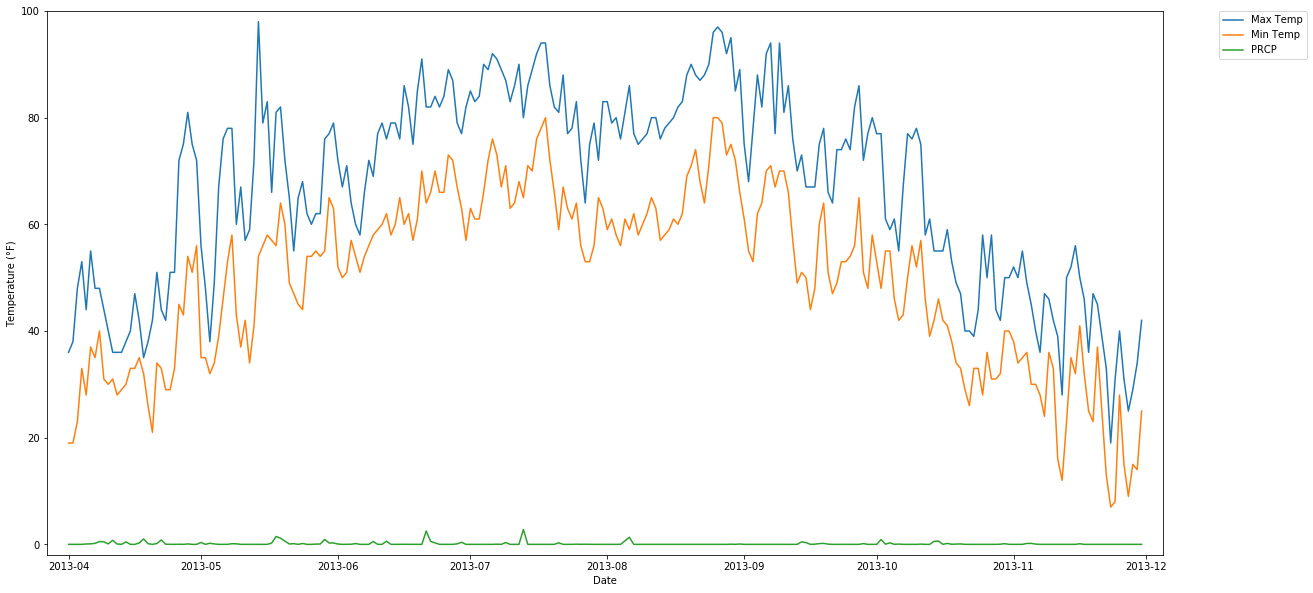

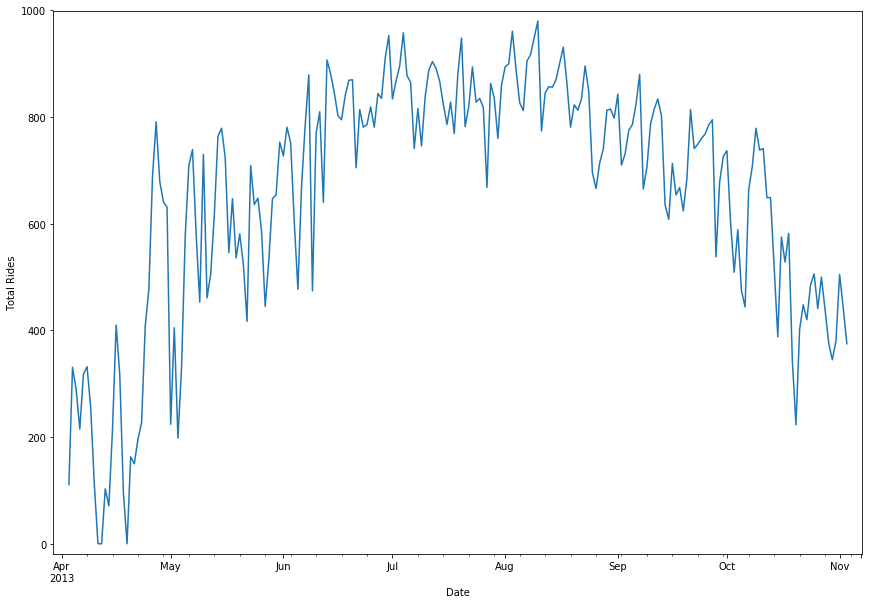

In [23]:
plt.figure(figsize=(20,10))
plt.plot(weather_2013.DATE, weather_2013.TMAX, label = 'Max Temp', linestyle='-')
plt.plot(weather_2013.DATE, weather_2013.TMIN, label = 'Min Temp', linestyle='-')
plt.plot(weather_2013.DATE, weather_2013.PRCP, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (째F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14.5,10))
daily_total_2013.plot()
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.margins(.02)
plt.show()

/home/grimoire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


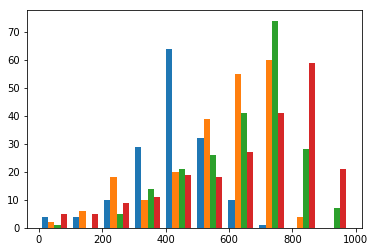

In [24]:
plt.hist((daily_total_2010, daily_total_2011, daily_total_2012, daily_total_2013))
plt.show()

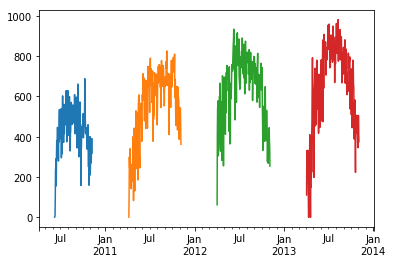

In [25]:
daily_total_2010.plot()
daily_total_2011.plot()
daily_total_2012.plot()
daily_total_2013.plot()
plt.show()

ValueError: setting an array element with a sequence.

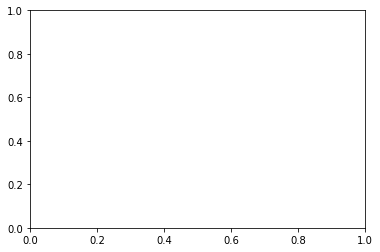

In [26]:
plt.plot((daily_total_2010, daily_total_2011), (daily_total_2010, daily_total_2011))
plt.show()

This will be used to make a yearly station distance matrix to plot station locations by year.

In [ ]:
'''
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
'''